# 機械学習レポート

# 機械学習モデリングプロセス

1. 問題設定：機械学習が必要か？　データは集まるのか？　分布はどうか？
2. データ選定：GIGOになっていないか？
3. データの前処理：EDA（Kaggleが有用）、欠損・外れ値処理などが必要か？
4. 機械学習、モデルの選定
5. モデルの学習
6. モデルの評価

# 機械学習

タスク$T$および性能指標$P$に関して、経験$E$から学習する。

人がプログラムするのは認識の仕方ではなく、学習の方法

# 線形回帰
---

## 概要

線形回帰モデルは、離散値あるいは連続値である入力$X$から連続値である出力$y$を予測する回帰問題を定式化したものの1つである。

パラメータを$w$とすると、下式のように表される。

$$y = Xw + \epsilon$$
$$\epsilon : error(偶発誤差)$$

目的は、予測値$\hat y$と実測値$y$との差の二乗の総和の平均である平均二乗誤差Mean Squared Error: $MSE$を最小化することである。

上記は最小二乗法を用いて下式のように解析的に解くことが可能である。

$MSE_{train} = J(w) = \frac{1}{n_{train}} \sum_{i=1}^{n_{train}} \bigl(\hat y_{i}^{(train)} - y_{i}^{(train)} \bigr) ^ 2$

$\hat w = arg min_{w \in \mathbb R} J(w) \Leftrightarrow　\frac{\partial}{\partial w} J(w) = 0$

$\hat w = (X^T X)^{-1} X^T y$

## 実装演習
---

In [1]:
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np

# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()

# keyの確認
print(boston.keys())

#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

# 最初の5行を表示
print(df.head(5))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [2]:
# 一変数(単回帰分析)
# 説明変数
data = df.loc[:, ['RM']].values
# 目的変数
target = df.loc[:, 'PRICE'].values

# sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)
# fit関数でパラメータ推定
model.fit(data, target)
# 予測
model.predict([[7]])

array([29.04414209])

In [3]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [4]:
model.score(data, target)

0.48352545599133423

In [5]:
# 二変数(重回帰分析)
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values
# オブジェクト生成
model2 = LinearRegression()
# fit関数でパラメータ推定
model2.fit(data2, target2)
model2.predict([[0.3, 7]])

array([29.4132843])

In [6]:
model2.score(data2, target2)

0.5419591738494084

In [7]:
# 重回帰の回帰係数と切片を出力
print(model2.coef_)
print(model2.intercept_)

[-0.26491325  8.39106825]
-29.24471945192992


## 考察

説明変数として、"RM"のみを使用した線形回帰モデル(モデル1)と"RM"に"CRIM"を説明変数とした線形回帰モデル(モデル2)を作成した。
線形回帰モデルの評価指標である決定係数がモデル1:0.48からモデル2:0.54へと改善していることから、"CRIM"を説明変数として加えたことでこの線形回帰モデルが改善されていることがわかる。
より多くの説明変数を使用する、またはより複雑なモデルを導入することでさらなる改善が得られる可能性があるが、過学習overfittingに留意する必要がある。

## メモ


### 線形とは『比例』のこと

- n次元における超平面の方程式

\begin{align}
y &= a_0 + a_1x_1 + \cdots + a_{n-1}x_{n-1} \\
&= a_0 + \sum_{i=1}^{n-1} a_ix_i \\
&= \sum_{i=0}^{n-1}a_ix_i (where \quad x_0 \equiv 1) \\
&= \mathbb{a}^T \cdot \mathbb{x} (where \quad \mathbb{a} = (a_0, a_1, \cdots, a_n)^T, \mathbb{x} = (x_0, x_1, \cdots, x_n)^T)
\end{align}

---

### 回帰問題

ある入力（離散あるいは連続値）から出力（連続値）を予測する

密度比推定

入力：m次元のベクトル $$x = (x_0, x_1, \cdots, x_m)^T \in \mathbb{R}^m$$
出力：スカラー $$y \in \mathbb{R}^1$$

---

### 線形回帰モデル

教師データ：　($x_i$, $y_i$) ($i = 1, \cdots, n$)

パラメータ： $w = (w_0, w_1, \cdots, w_m) \in \mathbb R^m$ 

線形結合
$$ \hat y = w^T x$$

---
### パラメータ推定(最小二乗法)

モデル式：
$\begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix}$
$=$
$\begin{pmatrix}
y_1 \cdots x_{1m} \\
\vdots \\
x_{n0} \cdots x_{nm}
\end{pmatrix}$
$\begin{pmatrix}
w_0 \\
\vdots \\
w_m
\end{pmatrix}$
$+$
$\epsilon$

$\epsilon$ : error(偶発誤差)

$\hat y = Xw$

$X$: 計画行列

$n < m + 1$のとき、方程式を解くのが困難

-> deep learningでデータが必要になる理由

線形回帰モデルのパラメータは最小二乗法で推定

---

### 残差平方和

$\sum_i (\hat y_i - y_i)^2 = \sum_i \epsilon_{i}^2$

* 二乗損失は一般的に外れ値に弱い

---

### 平均二乗誤差

$MSE_{train} = J(w) = \frac{1}{n_{train}} \sum_{i=1}^{n_{train}} \bigl( \hat y_{i}^{(train)} - y_{i}^{(train)} \bigr)$

$\hat w = arg min_{w \in \mathbb R} J(w) \Leftrightarrow　\frac{\partial}{\partial w} J(w)$

$$\frac{\partial}{\partial w} J(w) = 0$$
$$w = (X^T X)^{-1} X^T y$$

$$\hat y = X_{\ast} (X^T X)^{-1} X^T y$$

- $X_{\ast} (X^T X)^{-1}$: 射影行列

### 演習課題
---
設定
- ボストンの住宅データセットを線形回帰モデルで分析
- 適切な査定結果が必要

課題
- 部屋数が4で犯罪率が0.3の物件はいくらになるか？

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

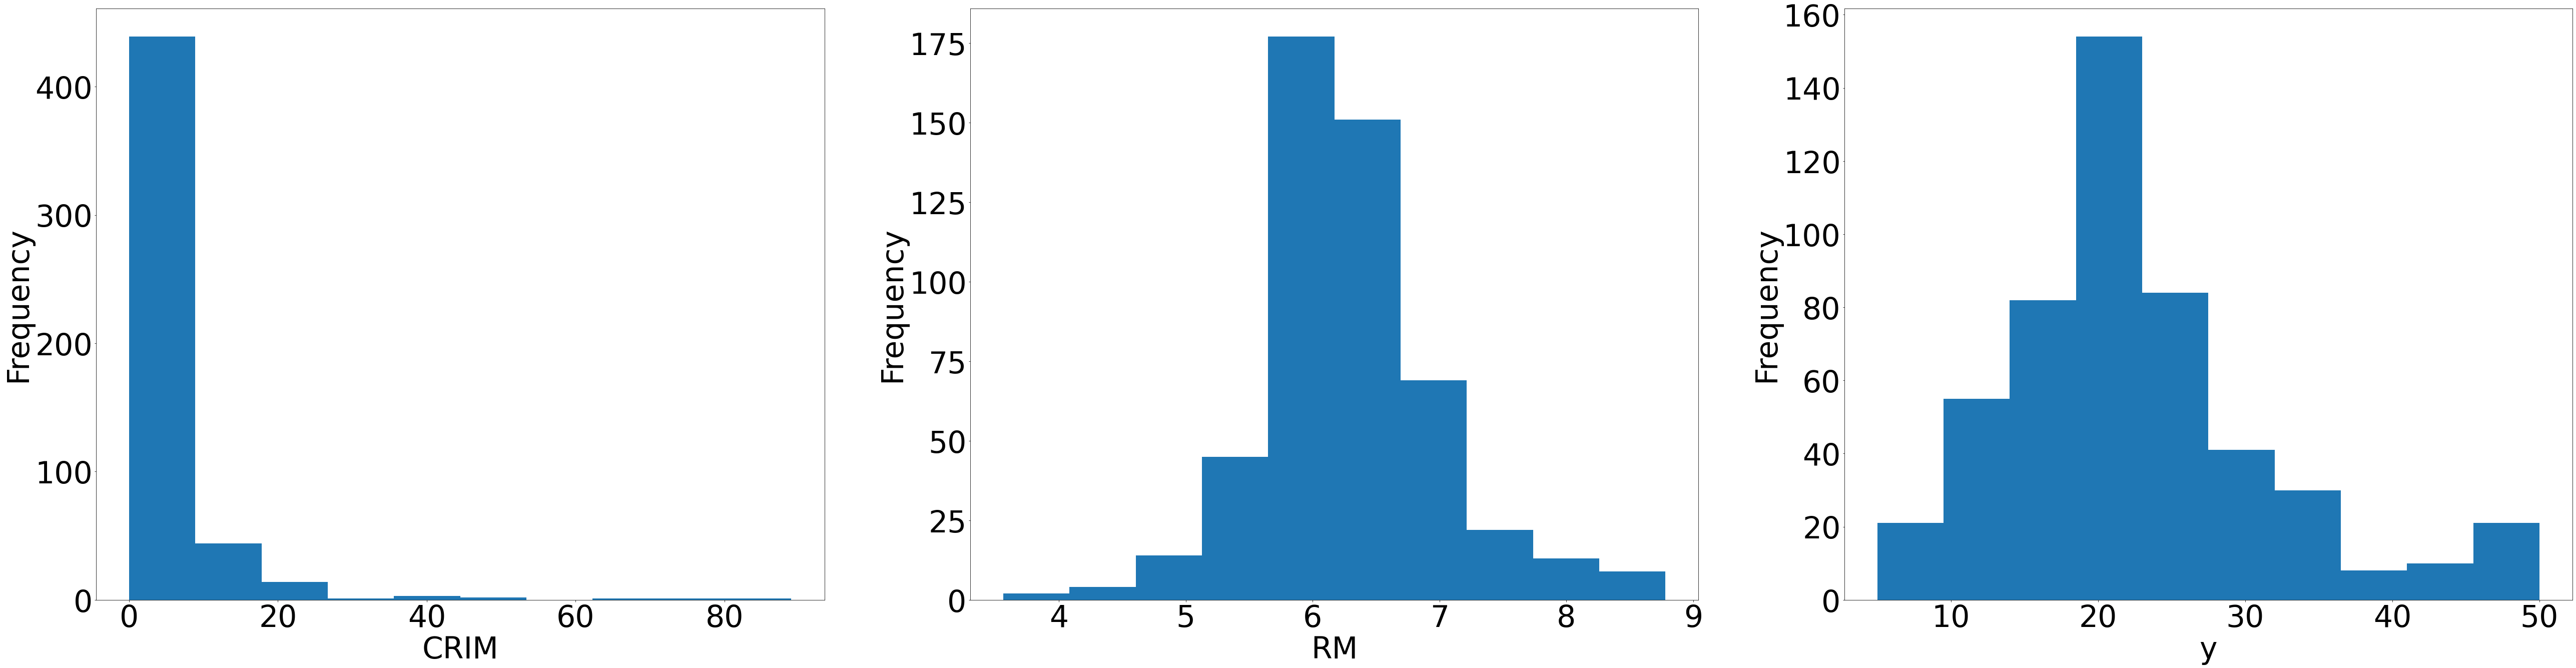

In [10]:
# データのロード
boston = load_boston()

# データセットの作成
dat = pd.DataFrame(boston['data'], columns = boston['feature_names'])
X = dat[["CRIM", "RM"]]
y = pd.DataFrame(boston['target'], columns = ['y'])
dat = pd.concat([X, y], axis=1)

# データの確認
# print(dat.head()) # データの読み込み確認
# dat.info()        # 列名・列毎の有効データ数(欠損数)・データ型の確認
# dat.describe()    # 列毎の基本統計量の確認
# sns.pairplot(dat) # 散布図行列の確認

# ヒストグラムで列毎の分布をチェック
fig = plt.figure(figsize=(120, 100))
for i in range(len(dat.columns)):
    ax = fig.add_subplot(4, 4, i+1)
    ax.hist(dat.iloc[:, i])
    plt.xlabel(dat.columns[i], fontsize=60)
    plt.ylabel("Frequency", fontsize=60)
    plt.tick_params(labelsize=60)
plt.show()

In [11]:
# OLSでパラメータの推定値を算出
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(Xb.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print('Slope(CRIM): %.3f' % w[1])
print('Slope(RM): %.3f' % w[2])
print('Intercept: %.3f' % w[0])

Slope(CRIM): -0.265
Slope(RM): 8.391
Intercept: -29.245


In [12]:
# 部屋数が4で犯罪率が0.3の物件はいくらになるか？
y_hat = -29.245 - 0.265 * (0.3) + 8.391 * (4)
print("予測値:", y_hat)

予測値: 4.2395


In [13]:
# このモデルの精度を決定係数で確認
y_mean = np.mean(y)
y_hat = np.dot(Xb, w)

R_2 = 1 - np.dot((y - y_hat).T, ((y - y_hat))) / np.dot((y - y_mean).T, (y - y_mean))
print("決定係数： {0:.3f}".format(R_2[0,0]))

決定係数： 0.542


In [14]:
from sklearn.preprocessing import StandardScaler

# 標準化して使用
SC_X = StandardScaler()
SC_y = StandardScaler()
X_std = SC_X.fit_transform(X)
y_std = SC_y.fit_transform(y)

Xb = np.hstack((np.ones((X_std.shape[0], 1)), X_std))
w = np.zeros(Xb.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y_std))
print('Slope(CRIM): %.3f' % w[1])
print('Slope(RM): %.3f' % w[2])
print('Intercept: %.3f' % w[0])

X_new = np.array([[0.3, 4.0]])
X_new_std = SC_X.fit_transform(X_new)
y_hat_std = - 0.259 * X_new_std[:, 0] + 0.636 * X_new_std[:, 1]
print("予測値:", y_hat_std)
y_mean, y_scale = SC_y.mean_, SC_y.scale_
y_hat_std_inv = y_scale * y_hat_std + y_mean
print("予測値:", y_hat_std_inv)

# モデル評価
y_mean = np.mean(y_std)
y_hat = np.dot(Xb, w)
R_2 = 1 - np.dot((y_std - y_hat).T, ((y_std - y_hat))) / np.dot((y_std - y_mean).T, (y_std - y_mean))
print("決定係数：{0:.3f}".format(R_2[0,0]))

Slope(CRIM): -0.248
Slope(RM): 0.641
Intercept: 0.000
予測値: [0.]
予測値: [22.53280632]
決定係数：0.542


In [15]:
# scikit-learnの線形回帰モデルを使用した場合
# データ標準化なし
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

model = LR.fit(X, y)

print("sckit-learnの線形回帰モデルの評価指標(標準化なし): {0}".format(model.score(X, y)))

X_pred = np.array([[0.3, 4.0]])
print("sckit-learnの線形回帰モデルでの予測値(標準化なし): {0}".format(model.predict(X_pred)))

# scikit-learnの線形回帰モデルを使用した場合
# データ標準化あり
model_std = LR.fit(X_std, y_std)

print("sckit-learnの線形回帰モデルの評価指標(標準化あり): {0}".format(model.score(X_std, y_std)))

X_pred = np.array([[0.3, 4.0]])
X_pred_std = SC_X.fit_transform(X_pred)
y_pred_std = model.predict(X_pred_std)
y_pred = SC_y.inverse_transform(y_pred_std)
print("sckit-learnの線形回帰モデルでの予測値(標準化あり): {0}".format(y_pred))

sckit-learnの線形回帰モデルの評価指標(標準化なし): 0.5419591738494084
sckit-learnの線形回帰モデルでの予測値(標準化なし): [[4.24007956]]
sckit-learnの線形回帰モデルの評価指標(標準化あり): 0.5419591738494083
sckit-learnの線形回帰モデルでの予測値(標準化あり): [[22.53280632]]


# 非線形回帰モデル
---
## 概要
非線形回帰モデルは、線形回帰モデルの$x$の代わり$x$の関数である$\phi (x)$を用いる。この関数は高次元多項式、三角関数、指数・対数関数などがある。
$x$を$\phi(x)$に変えても、$w$については線形であるため本質的には線形回帰モデルと同様に解くことが可能である。よく使われる$\phi(x)$として多項式関数、ガウス基底関数、スプラインなどがある。

$\hat y = w_0 + w_1 \cdot \phi_1 (x) + \cdots w_m \cdot \phi_m (x)$

$\Phi^{(train)} = (\phi(x_1), \phi(x_2), \cdots, \phi(x_n))^T \in \mathbb R^{n + k}$

$y = \Phi w$

$\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$

## 実装演習

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

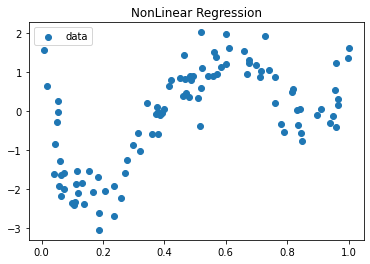

In [17]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z

# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target, label="data")

plt.title('NonLinear Regression')
plt.legend(loc=2)

plt.show()

0.3578737505963373


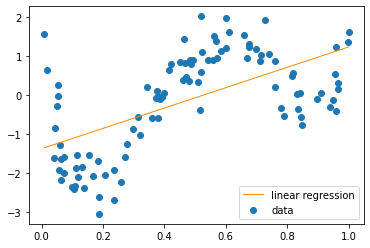

In [18]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

0.8340218651072779


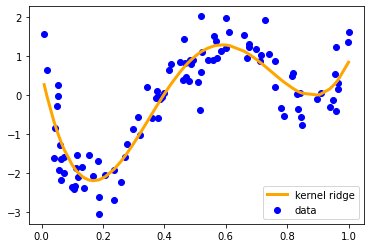

In [19]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)
print(clf.score(data, target))

0.7855972317283804


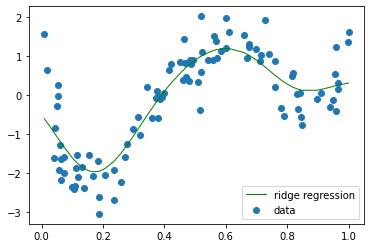

In [20]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
#for i in range(len(kx)):
#plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
plt.legend()

print(clf.score(kx, target))

次数1のスコア: 0.35787375479093453
次数2のスコア: 0.4514699621170988
次数3のスコア: 0.5451298302404692
次数4のスコア: 0.8478187486286675
次数100のスコア: 0.872252338637125


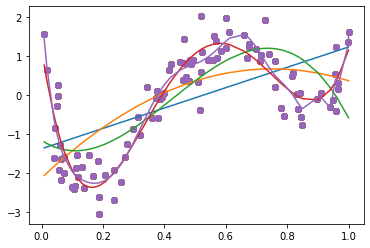

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#PolynomialFeatures(degree=1)

deg = [1, 2, 3, 4, 100]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    print("次数{0}のスコア: {1}".format(d, regr.score(data, target)))
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

0.8224175075141809


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.229656219482422, tolerance: 0.016560660675168037
  model = cd_fast.enet_coordinate_descent(


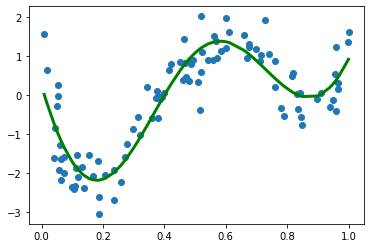

In [22]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=0.001, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

0.8201967183839248


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


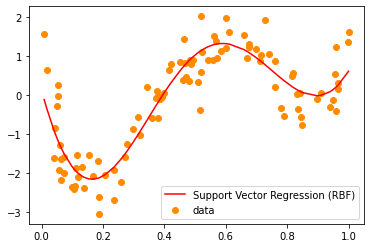

In [23]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=1.5, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
print(clf_svr.score(data, target))

# plot
plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
cb_cp = ModelCheckpoint('./checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='./tensorBoard', histogram_freq=0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 78ms/step - loss: 1.9546 - val_loss: 1.4880

Epoch 00001: saving model to ./checkpoints/weights.01-1.49.hdf5
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 1.6468 - val_loss: 1.2069

Epoch 00002: saving model to ./checkpoints/weights.02-1.21.hdf5
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 1.0511 - val_loss: 1.3518

Epoch 00003: saving model to ./checkpoints/weights.03-1.35.hdf5
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 0.8221 - val_loss: 1.2278

Epoch 00004: saving model to ./checkpoints/weights.04-1.23.hdf5
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 0.5724 - val_loss: 1.2817

Epoch 00005: saving model to ./checkpoints/weights.05-1.28.hdf5
Epoch 6/100
18/18 [==============================] - 1s 32ms/step - loss: 0.4934 - val_loss: 1.4396

Epoch 00006: saving model to ./checkpoints/weights.06-1.44.hdf5
Epoch 7/10

In [25]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 4ms/step


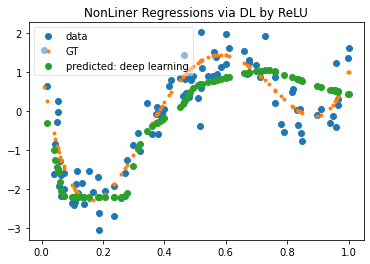

In [26]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o', label='data')
plt.plot(data, true_func(data), '.', label='GT')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
plt.legend(loc=2, framealpha=0.5)

---
### 計画行列
$\Phi^{(train)} = (\phi(x_1), \phi(x_2, \cdots, \phi(x_n))^T \in \mathbb R^{n + k}$

$y = X w \rightarrow y = \Phi w$

-> 結局、MSEを最小化する$w$は線形回帰と同じ

$\hat w = (X^T X)^{-1} X^T y$
$\rightarrow \hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$

---
### 未学習と過学習

未学習：モデルがデータを表すだけの十分な表現力がない状態
- 複雑なモデルを導入する

過学習：モデルが学習データに過剰に適合してしまい、テストデータで十分な性能を発揮できない状態
- データ数を増やす
- 正則化　($w$を操作)
- より単純なモデルを導入 ($x$を操作)

---
### 正則化

$$S_{\gamma} = (y - \Phi w)^T (y - \Phi w) + \gamma R(w)$$

- モデルの複雑さに伴って、その値が大きくなる正則化項(罰則項)を課した関数を最小化
- $\gamma R(w)$: 正則化項(罰則項)は、形状によっていくつもの種類があり、それぞれ推定量の性質が異なる
- $\gamma$: 正則化(平滑化)パラメータで、モデルの曲線のなめらかさを調節する。適切に決める必要がある。

$J(w) = MSE$のとき、
$$E(w) = J(w) + \lambda \cdot w^T \cdot w$$

解きたいのは、$min J(w)\, s.t.\ R(w) \le r$

(最適化) KKT条件より、
$$min J(w) + \lambda \cdot R(w)$$

#### Ridge

$$L2: ||w||_{2}^{2} = \sum_{j=1}^{m}w_{j}^{2}$$

縮小推定: パラメータを0に近づけるよう推定(ただし、0にはならない)

#### Lasso

$$L1: ||w||_{1} = \sum_{j=1}^{m}|w_{j}|$$

スパース推定: いくつかのパラメータを正確に0に推定

---
### モデル評価

#### ホールド・アウト法

データを学習データと検証データに分けて、学習データを使って学習した後、検証データを使ってモデルの検証を行う。
ただし、
- データ数が少ないとき
- おかしなデータが検証データに入ってしまったとき

は使用しない。

#### Closs Validation法

データをいくつかに分割した後、1つを検証データ、残りを学習データとし、学習・検証を行い、これを分割した数だけ繰り返し、得られた評価指標を統合する(平均するなど)。

---
### ハイパーパラメータ探索

#### グリッドサーチ
全てのハイパーパラメータの組み合わせで評価値を算出する方法で、最も良い評価値を持つハイパーパラメータの組み合わせを採用する。
計算コストが高い。

#### ランダムサーチ
ランダムに選択されたハイパーパラメータの組み合わせで評価値を算出する方法。
計算コストの削減が期待できるが、選択された組み合わせがベストである保証はない。

#### ベイズ最適化
探索と活用を繰り返し、得られた結果を利用することで最適な組み合わせを選ぶ方法。

# ロジスティック回帰
---

## 概要

ロジスティック回帰モデルは、分類問題(クラス分類)を解く手法の1つである。
離散値あるいは連続値である入力$X$から0または1である出力$y$を予測する。
入力の線形結合をシグモイド関数に適応し、$y = 1$となる確率が0.5以上なら1、0.5未満なら0と予測する。

## 実装演習

In [27]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [28]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('./data/titanic_train.csv')

In [29]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#予測に不要と考えるからうをドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [31]:
#Ageカラムのnullを平均値で補完

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


Intercept: [-0.94131796]
Coefficient: [[0.01519666]]


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Probability')

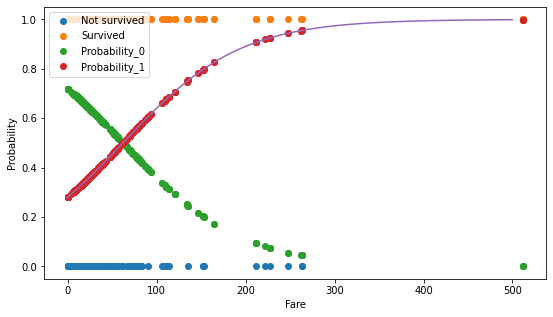

In [32]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(data1, label1)

# model.predict([[61]])

# model.predict_proba([[62]])

X_test_value = model.decision_function(data1) 

# # 決定関数値（絶対値が大きいほど識別境界から離れている）
# X_test_value = model.decision_function(X_test) 
# # 決定関数値をシグモイド関数で確率に変換
# X_test_prob = normal_sigmoid(X_test_value) 

print ("Intercept: {}".format(model.intercept_))

print ("Coefficient: {}".format(model.coef_))

w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
# plt.xkcd()
# plt.ylim(-0.1, 1.1)
# plt.xlim(-10, 10)
# plt.plot([-10,10],[0,0], "k", lw=1)
# plt.plot([0,0],[-1,1.5], "k", lw=1)
plt.plot(data1[label1 == 0], np.zeros(len(data1[label1 == 0])), 'o', label="Not survived")
plt.plot(data1[label1 == 1], np.ones(len(data1[label1 == 1])), 'o', label="Survived")
plt.plot(data1, model.predict_proba(data1)[:, 0], 'o', label="Probability_0")
plt.plot(data1, model.predict_proba(data1)[:, 1], 'o', label="Probability_1")
plt.plot(x_range, sigmoid(x_range), '-')
plt.legend(loc=2)
plt.xlabel("Fare")
plt.ylabel("Probability")
# plt.plot(x_range, normal_sigmoid(x_range), '-')
#

In [33]:
#AgeFillの欠損値を埋めたので
#titanic_df = titanic_df.drop(['Age'], axis=1)

In [34]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'], axis=1)

In [35]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   SibSp          891 non-null    int64  
 2   Parch          891 non-null    int64  
 3   Fare           891 non-null    float64
 4   Embarked       889 non-null    object 
 5   AgeFill        891 non-null    float64
 6   Pclass_Gender  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


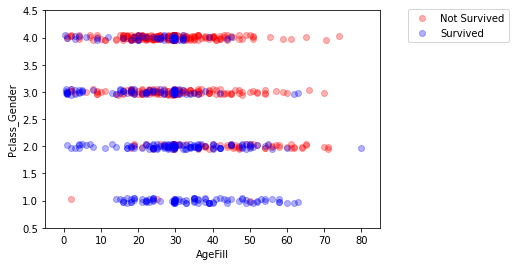

In [37]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


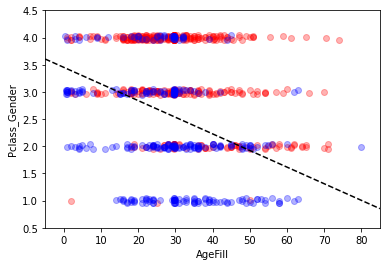

In [38]:
#年齢（欠損値補完）と客室クラスと性別を合わせた変数のリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values

#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values

model2 = LogisticRegression()

model2.fit(data2, label2)

model2.predict([[10,1]])

model2.predict_proba([[10,1]])

h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

In [39]:
from sklearn.model_selection import train_test_split

traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)

traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)

data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
print(traindata.shape)
print(trainlabel.shape)

eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()

predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

print("model1 train accuracy: {:.3f}".format(eval_model1.score(traindata1, trainlabel1)))
print("model1 test accuracy: {:.3f}".format(eval_model1.score(testdata1,testlabel1)))
print("model2 train accuracy: {:.3f}".format(eval_model2.score(traindata2, trainlabel2)))
print("model2 test accuracy: {:.3f}".format(eval_model2.score(testdata2,testlabel2)))

(712, 7)
(712, 1)
model1 train accuracy: 0.657
model1 test accuracy: 0.704
model2 train accuracy: 0.777
model2 test accuracy: 0.782


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       122
           1       0.58      0.26      0.36        57

    accuracy                           0.70       179
   macro avg       0.65      0.59      0.58       179
weighted avg       0.68      0.70      0.67       179

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       115
           1       0.71      0.66      0.68        64

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



<AxesSubplot:>

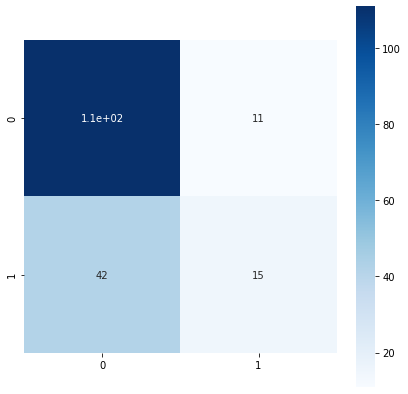

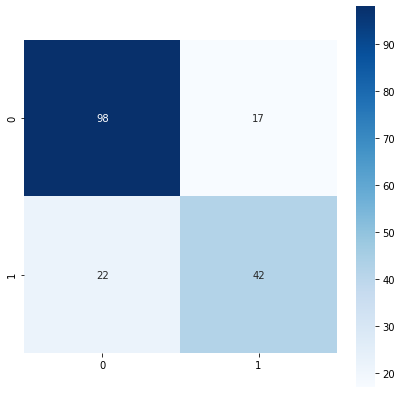

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)

confusion_matrix1
confusion_matrix2

fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

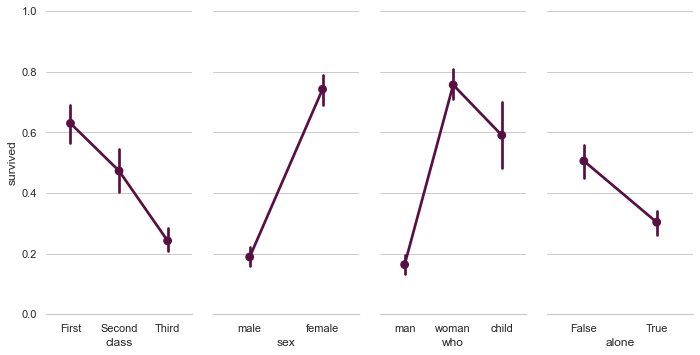

In [42]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

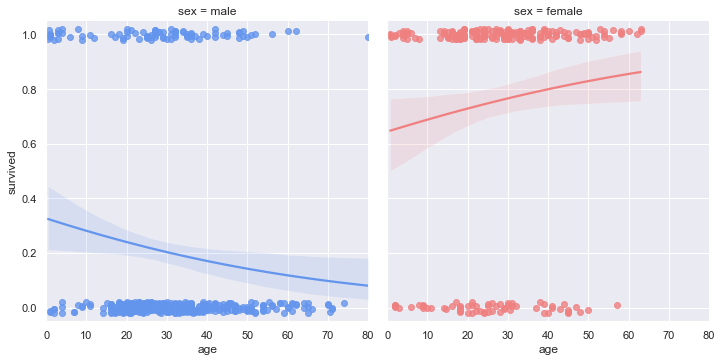

In [43]:
#Faceted logistic regression

import seaborn as sns
import statsmodels.api

sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

# 主成分分析(PCA)
---

## 概要
主成分分析(Principal Component Analysis: PCA)は、特徴抽出による次元削減を行う手法の1つである。
PCAの目的は高次元データにおいて分散が最大となる方向を見つけ出し、より低い次元の新しい部分空間へ射影することである。
したがって、PCAを行う前に特徴量を標準化する必要がある。具体的な手順は以下の通りである。

$\star$ 主成分分析手順

1. $d$次元のデータセットを標準化する。
2. 標準化したデータセットの共分散行列を作成する。
3. 共分散行列を固有ベクトルと固有値に分解する。
4. 固有値を降順でソートすることで、対応する固有ベクトルをランク付けする。
5. 最も大きい$k$個の固有値に対応する$k$個の固有ベクトルを選択する。この場合の$k$は新しい特徴部分空間の次元数を表す($k \le d$)
6. 上位k個の固有ベクトルから射影行列$W$を作成する。
7. 射影行列$W$を使って$d$次元の入力データセット$X$を変換し、新しい$k$次元特徴部分空間を取得する。

## 実装演習

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

<BarContainer object of 30 artists>

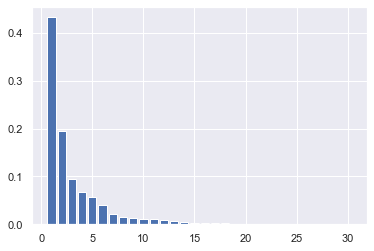

In [45]:
cancer_df = pd.read_csv('./data/cancer.csv')

cancer_df.drop('Unnamed: 32', axis=1, inplace=True)

# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]

# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

(426, 30)
X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

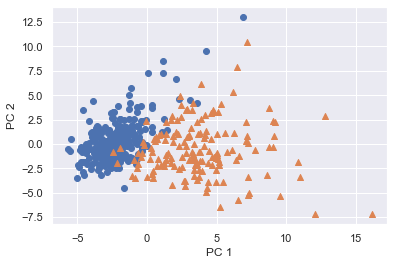

In [46]:
# PCA
# 次元数2まで圧縮
print(X_train_scaled.shape)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

# k近傍法(kNN)
---

## 概要
k近傍法(k-nearest neighbor classifier: kNN)とは、選択された距離指標に基づき、トレーニングデータセットのサンプルの中から分類したいデータ点に最も近いk個のサンプルを見つけ出し、多数決に基づいて分類する方法である。
トレーニングデータから判別関数を学習せず、トレーニングデータセットを暗記するので怠惰学習(lazy learning)と呼ばれる。

$\star$ kNNアルゴリズム
1. kの値と距離指標を選択する。
2. 分類したいサンプルからk個の最近傍のデータを見つけ出す。
3. 多数決によりクラスラベルを割り当てる。

## 実装演習

Text(0.5, 0, 'n_neighbors')

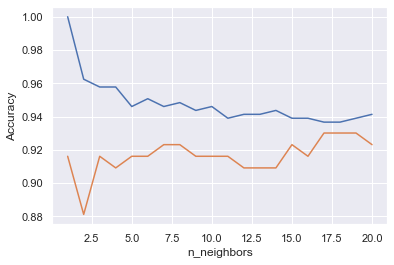

In [47]:
# ライブラリのインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

# グラフ描画用のリストを準備
training_acc = []
test_acc = []

# 学習
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1, 21), training_acc, label = 'Training')
plt.plot(range(1, 21), test_acc, label = 'Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')

# k-means
---

## 概要
k平均(k-means)法とは、クラスタリング手法の1つである。
以下のアルゴリズムに従ってデータを予め定めた数のクラスタに分類する。

$\star$ k-meansアルゴリズム
1. クラスタの中心の初期値として、サンプル点からk個のセントロイドをランダムに選び出す。
2. 各サンプルを最も近いセントロイド$\mu^{(j)}$に割り当てる
$$\mu^{(j)}, j \in \{ 1, \cdots, k\}$$
3. セントロイドに割り当てられたサンプルの中心に、セントロイドを移動する。 
4. サンプル点へのクラスタの割り当てが変化しなくなるか、ユーザー定義の許容値またはイテレーションの最大回数に達するまで、手順2~3を繰り返す。

- クラスタ中心と各サンプル点との距離はユークリッド距離の2乗などを用いる。
$$d(x, y)^2 = \sum_{j=1}^{m}(x_j - y_j)^2 = ||x - y||_{2}^{2}$$


## 実装演習

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [49]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

print(X.shape, y.shape, wine.target_names)

model = KMeans(n_clusters=3)

labels = model.fit_predict(X)

df = pd.DataFrame({'labels': labels})

def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

df['species'] = [species_label(theta) for theta in wine.target]

pd.crosstab(df['labels'], df['species'])

(178, 13) (178,) ['class_0' 'class_1' 'class_2']


species,class_0,class_1,class_2
labels,,,
0,46,1,0
1,13,20,29
2,0,50,19


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()

X = wine.data
y = wine.target

sc = StandardScaler()

X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=3)

labels = model.fit_predict(X_sc)

df = pd.DataFrame({'labels': labels})

def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

df['species'] = [species_label(theta) for theta in wine.target]

pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,0,3,48
1,0,65,0
2,59,3,0


# SVM (support vector machine)
---

## 概要
サポートベクターマシーン(Support Vector Machine: SVM)は、分類問題にも回帰問題にも適用可能な学習アルゴリズムで、広く利用されている。SVMの最適化の目的は超平面(決定境界)とこの超平面に最も近いトレーニングサンプルとの距離、マージンを最大化することである。超平面に最も近いサンプルはサポートベクトルと呼ばれる。

## 実装演習

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

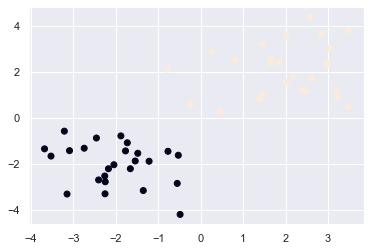

In [52]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

In [53]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [54]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [55]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

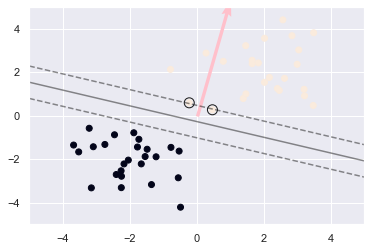

In [56]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

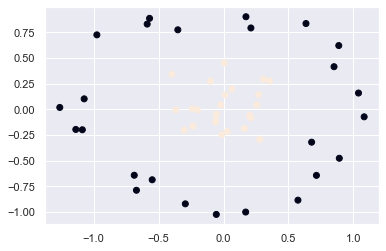

In [57]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [58]:
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

In [59]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [60]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

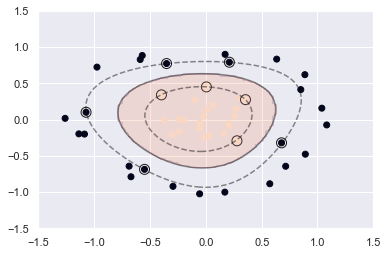

In [61]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

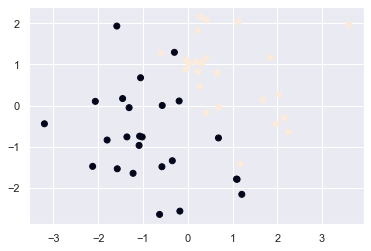

In [62]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [63]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

In [64]:
ndex = a > 1e-8
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [65]:
xx0, xx1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

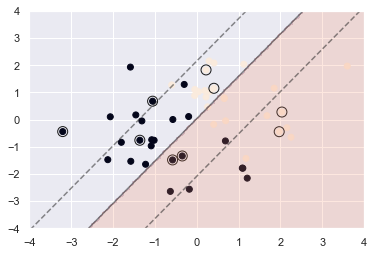

In [66]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])